Nama Kelompok:
1. Alif Wira Bayu (221910814)
2. Denisa Hilmy Atiqah (221911050)
3. Dwi Joko Purnomo (221910685)
4. Latifa Rahmadani Jamal (221911099)
5. Riofebri Prasetia (221911192)

Data yang digunakan adalah adult.data

deskripsi:
Ekstraksi dilakukan oleh Barry Becker dari database Sensus 1994. Satu set catatan yang cukup bersih diekstraksi menggunakan kondisi berikut: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Tugas prediksi adalah menentukan apakah seseorang menghasilkan lebih dari 50 ribu setahun.

**Import library yang diperlukan. Kemudian import data adult.data
data yang digunakan ialah adult.**
data dimana data ini menentukan apakah seseorang menghasilkan lebih dari 50 ribu setahun.

In [8]:
from sklearn import neighbors, datasets, model_selection, metrics
import pandas as pd

# reading csv files
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]
data =  pd.read_csv(url, sep=", ", names = names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [9]:
# data = data[data['workclass'] != '?']

**Lihat tabel dan struktur dataset nya terlebih dahulu.**

In [10]:
# get some rows informations
print(data)

# describe the data
data.describe()

       age         workclass  fnlwgt  ... hours-per-week  native-country salary
0       39         State-gov   77516  ...             40   United-States  <=50K
1       50  Self-emp-not-inc   83311  ...             13   United-States  <=50K
2       38           Private  215646  ...             40   United-States  <=50K
3       53           Private  234721  ...             40   United-States  <=50K
4       28           Private  338409  ...             40            Cuba  <=50K
...    ...               ...     ...  ...            ...             ...    ...
32556   27           Private  257302  ...             38   United-States  <=50K
32557   40           Private  154374  ...             40   United-States   >50K
32558   58           Private  151910  ...             40   United-States  <=50K
32559   22           Private  201490  ...             20   United-States  <=50K
32560   52      Self-emp-inc  287927  ...             40   United-States   >50K

[32561 rows x 15 columns]


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**cek skala atau type atribut**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Cek Apakah masih ada data yang mengandung null**
dalam dataset ini data yang mengandung null adalah atribut atau baris yang bernilai '?'

In [12]:
# data['workclass'].value_counts()
for x in data.columns :
  print((data[x] == '?').value_counts())
  print()

False    32561
Name: age, dtype: int64

False    30725
True      1836
Name: workclass, dtype: int64

False    32561
Name: fnlwgt, dtype: int64

False    32561
Name: education, dtype: int64

False    32561
Name: education-num, dtype: int64

False    32561
Name: marital-status, dtype: int64

False    30718
True      1843
Name: occupation, dtype: int64

False    32561
Name: relationship, dtype: int64

False    32561
Name: race, dtype: int64

False    32561
Name: sex, dtype: int64

False    32561
Name: capital-gain, dtype: int64

False    32561
Name: capital-loss, dtype: int64

False    32561
Name: hours-per-week, dtype: int64

False    31978
True       583
Name: native-country, dtype: int64

False    32561
Name: salary, dtype: int64



**Drop baris pada tabel yang mengandung null**

In [13]:
for x in data.columns:
  data = data[data[x] != '?']

**Lihat tabel dan struktur nya**

In [14]:
# get some rows informations
print(data)

# describe the data
data.describe()

       age         workclass  fnlwgt  ... hours-per-week  native-country salary
0       39         State-gov   77516  ...             40   United-States  <=50K
1       50  Self-emp-not-inc   83311  ...             13   United-States  <=50K
2       38           Private  215646  ...             40   United-States  <=50K
3       53           Private  234721  ...             40   United-States  <=50K
4       28           Private  338409  ...             40            Cuba  <=50K
...    ...               ...     ...  ...            ...             ...    ...
32556   27           Private  257302  ...             38   United-States  <=50K
32557   40           Private  154374  ...             40   United-States   >50K
32558   58           Private  151910  ...             40   United-States  <=50K
32559   22           Private  201490  ...             20   United-States  <=50K
32560   52      Self-emp-inc  287927  ...             40   United-States   >50K

[30162 rows x 15 columns]


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Cek type data**

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  salary          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Lihat tabel 10 baris pertama**

In [16]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**Import library preprocessing**
untuk melakukan preprocessing data. mengkodekan variabel/atribut kategorik ke numerik

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for x in data.columns:
  data[x] = le.fit_transform(data[x])

data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38,0
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4,0
5,20,2,16567,12,13,2,3,5,4,0,0,0,39,38,0
6,32,2,7982,6,4,3,7,1,2,0,0,0,15,22,0
7,35,4,12746,11,8,2,3,0,4,1,0,0,44,38,1
8,14,2,1225,12,13,4,9,1,4,0,104,0,49,38,1
9,25,2,7908,9,12,2,3,0,4,1,78,0,39,38,1


**melakukan standarisasi data**
melakukan standarisasi data ke dalam bentuk standar normal

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_data = pd.DataFrame(scaler.fit_transform(data))

std_data.columns = data.columns
std_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.043010,2.936000,-1.293303,-0.349865,1.128918,0.947847,-1.479055,-0.261249,0.385048,0.692806,0.749323,-0.206679,-0.074036,0.264924,-0.575691
1,0.881097,1.887682,-1.251687,-0.349865,1.128918,-0.387275,-0.734545,-0.885737,0.385048,0.692806,-0.281409,-0.206679,-2.367686,0.264924,-0.575691
2,-0.033179,-0.208955,0.592986,0.174763,-0.439738,-1.722396,-0.238206,-0.261249,0.385048,0.692806,-0.281409,-0.206679,-0.074036,0.264924,-0.575691
3,1.109666,-0.208955,0.798596,-2.448375,-1.224066,-0.387275,-0.238206,-0.885737,-2.011035,0.692806,-0.281409,-0.206679,-0.074036,0.264924,-0.575691
4,-0.795076,-0.208955,1.462686,-0.349865,1.128918,-0.387275,0.754473,2.236703,-2.011035,-1.443405,-0.281409,-0.206679,-0.074036,-5.304034,-0.575691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,-0.871266,-0.208955,0.995566,-0.874492,0.736754,-0.387275,1.498983,2.236703,0.385048,-1.443405,-0.281409,-0.206679,-0.243936,0.264924,-0.575691
30158,0.119200,-0.208955,-0.400327,0.174763,-0.439738,-0.387275,0.009964,-0.885737,0.385048,0.692806,-0.281409,-0.206679,-0.074036,0.264924,1.737042
30159,1.490614,-0.208955,-0.431715,0.174763,-0.439738,2.282969,-1.479055,1.612215,0.385048,-1.443405,-0.281409,-0.206679,-0.074036,0.264924,-0.575691
30160,-1.252214,-0.208955,0.394077,0.174763,-0.439738,0.947847,-1.479055,0.987727,0.385048,0.692806,-0.281409,-0.206679,-1.773036,0.264924,-0.575691


**Drop atribut**
melakukan drop atribut education karena sudah terwkili dengan atribut education num

In [19]:
std_data = std_data.drop(columns=['education'])

**Lihat tabel setelah standarisasi**

In [20]:
std_data

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.043010,2.936000,-1.293303,1.128918,0.947847,-1.479055,-0.261249,0.385048,0.692806,0.749323,-0.206679,-0.074036,0.264924,-0.575691
1,0.881097,1.887682,-1.251687,1.128918,-0.387275,-0.734545,-0.885737,0.385048,0.692806,-0.281409,-0.206679,-2.367686,0.264924,-0.575691
2,-0.033179,-0.208955,0.592986,-0.439738,-1.722396,-0.238206,-0.261249,0.385048,0.692806,-0.281409,-0.206679,-0.074036,0.264924,-0.575691
3,1.109666,-0.208955,0.798596,-1.224066,-0.387275,-0.238206,-0.885737,-2.011035,0.692806,-0.281409,-0.206679,-0.074036,0.264924,-0.575691
4,-0.795076,-0.208955,1.462686,1.128918,-0.387275,0.754473,2.236703,-2.011035,-1.443405,-0.281409,-0.206679,-0.074036,-5.304034,-0.575691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,-0.871266,-0.208955,0.995566,0.736754,-0.387275,1.498983,2.236703,0.385048,-1.443405,-0.281409,-0.206679,-0.243936,0.264924,-0.575691
30158,0.119200,-0.208955,-0.400327,-0.439738,-0.387275,0.009964,-0.885737,0.385048,0.692806,-0.281409,-0.206679,-0.074036,0.264924,1.737042
30159,1.490614,-0.208955,-0.431715,-0.439738,2.282969,-1.479055,1.612215,0.385048,-1.443405,-0.281409,-0.206679,-0.074036,0.264924,-0.575691
30160,-1.252214,-0.208955,0.394077,-0.439738,0.947847,-1.479055,0.987727,0.385048,0.692806,-0.281409,-0.206679,-1.773036,0.264924,-0.575691


**import library seaborn**
cek apakah inbalance atau tidak

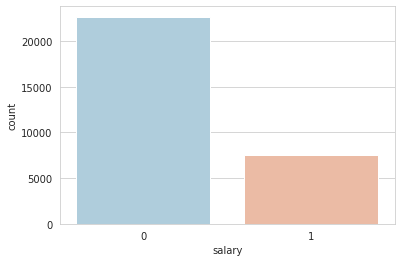

In [21]:
import seaborn as sns

sns.set_style('whitegrid')
sns.countplot(x=data['salary'],data=data,palette='RdBu_r')

**Mengembalikan label salary ke dalam bentuk kategorik dalam angka**

In [22]:
std_data['salary'] = le.fit_transform(std_data['salary'])
std_data

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.043010,2.936000,-1.293303,1.128918,0.947847,-1.479055,-0.261249,0.385048,0.692806,0.749323,-0.206679,-0.074036,0.264924,0
1,0.881097,1.887682,-1.251687,1.128918,-0.387275,-0.734545,-0.885737,0.385048,0.692806,-0.281409,-0.206679,-2.367686,0.264924,0
2,-0.033179,-0.208955,0.592986,-0.439738,-1.722396,-0.238206,-0.261249,0.385048,0.692806,-0.281409,-0.206679,-0.074036,0.264924,0
3,1.109666,-0.208955,0.798596,-1.224066,-0.387275,-0.238206,-0.885737,-2.011035,0.692806,-0.281409,-0.206679,-0.074036,0.264924,0
4,-0.795076,-0.208955,1.462686,1.128918,-0.387275,0.754473,2.236703,-2.011035,-1.443405,-0.281409,-0.206679,-0.074036,-5.304034,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,-0.871266,-0.208955,0.995566,0.736754,-0.387275,1.498983,2.236703,0.385048,-1.443405,-0.281409,-0.206679,-0.243936,0.264924,0
30158,0.119200,-0.208955,-0.400327,-0.439738,-0.387275,0.009964,-0.885737,0.385048,0.692806,-0.281409,-0.206679,-0.074036,0.264924,1
30159,1.490614,-0.208955,-0.431715,-0.439738,2.282969,-1.479055,1.612215,0.385048,-1.443405,-0.281409,-0.206679,-0.074036,0.264924,0
30160,-1.252214,-0.208955,0.394077,-0.439738,0.947847,-1.479055,0.987727,0.385048,0.692806,-0.281409,-0.206679,-1.773036,0.264924,0


**Buat Model K-Neirest Neighbor**

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(std_data.drop(columns=['salary']), std_data[['salary']], test_size=0.33, random_state=69)

model = neighbors.KNeighborsClassifier(n_neighbors=3)

print(X_train)
print(y_train)

model.fit(X_train, y_train)

predicted = model.predict(X_test)
print(predicted)

# print(metrics.confusion_matrix(y_test, predicted))
# print(metrics.accuracy_score(y_test, predicted))

            age  workclass  ...  hours-per-week  native-country
21284 -1.023645  -0.208955  ...       -0.074036        0.264924
5773  -1.480783  -0.208955  ...       -0.923536        0.264924
12908  0.119200  -0.208955  ...       -0.074036        0.264924
22518 -0.642697  -0.208955  ...       -0.074036        0.264924
28223  0.043010  -0.208955  ...        1.624964        0.264924
...         ...        ...  ...             ...             ...
25015 -1.176024  -0.208955  ...       -0.074036        0.264924
9818   1.109666  -0.208955  ...        0.775464        0.264924
27243 -1.328404  -0.208955  ...       -0.074036        0.264924
4041   1.033476  -0.208955  ...       -0.074036        0.264924
23755 -1.480783  -0.208955  ...       -0.158986        0.264924

[20208 rows x 13 columns]
       salary
21284       0
5773        0
12908       0
22518       0
28223       0
...       ...
25015       0
9818        1
27243       0
4041        0
23755       0

[20208 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


[0 0 1 ... 0 1 0]


**Cek konfusion matriks**

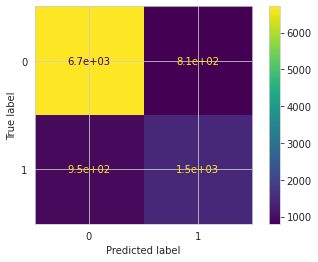

In [24]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predicted, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

**Menghitung Accuracy,Precision, Recall, dan F1-Score**

In [25]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7517
           1       0.65      0.61      0.63      2437

    accuracy                           0.82      9954
   macro avg       0.76      0.75      0.76      9954
weighted avg       0.82      0.82      0.82      9954



**Cek akurasi model**

In [26]:
model.score(X_test, y_test)

0.8238898935101466

**Lakukan Cross Validation**
sebelum itu lakukan import library cross_val_score

In [27]:
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = neighbors.KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[0.82261257 0.82285997 0.8260762  0.81069042 0.82430092]
cv_scores mean:0.8213080154051843


**Cek korelasi antar atribut**

In [28]:
print(std_data.drop(columns=['salary']).corr)

<bound method DataFrame.corr of             age  workclass  ...  hours-per-week  native-country
0      0.043010   2.936000  ...       -0.074036        0.264924
1      0.881097   1.887682  ...       -2.367686        0.264924
2     -0.033179  -0.208955  ...       -0.074036        0.264924
3      1.109666  -0.208955  ...       -0.074036        0.264924
4     -0.795076  -0.208955  ...       -0.074036       -5.304034
...         ...        ...  ...             ...             ...
30157 -0.871266  -0.208955  ...       -0.243936        0.264924
30158  0.119200  -0.208955  ...       -0.074036        0.264924
30159  1.490614  -0.208955  ...       -0.074036        0.264924
30160 -1.252214  -0.208955  ...       -1.773036        0.264924
30161  1.033476   0.839364  ...       -0.074036        0.264924

[30162 rows x 13 columns]>


**Lihat model Korelasi antar atribut**

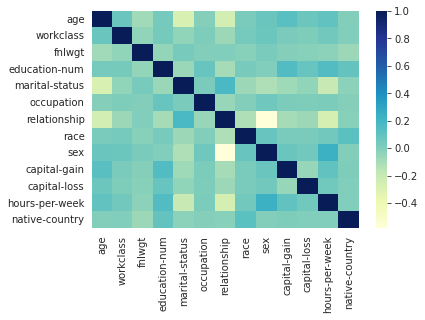

In [29]:
# plotting correlation heatmap
dataplot = sns.heatmap(std_data.drop(columns=['salary']).corr(), cmap="YlGnBu", annot=False)
  
# displaying heatmap
plt.show()

**Lakukan GridSearchCV untuk menemukan parameter terbaik**
Dimana tujuan itu untuk mencari nilai k, menentukan metode kemiripan yang tepat, dan menggunkan bobot uniform atau distance dengan cross validation 10

In [30]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters to tune
n_neighbors = list(range(1,10))
p = [1,2]
weights = ['uniform', 'distance']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p, weights=weights)

#Making model
clf = GridSearchCV(model, hyperparameters, cv=10)
best_model = clf.fit(X_train, y_train)

#Best Hyperparameters Value
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', best_model.best_estimator_.get_params()['weights'])

#Predict testing set
predicted2 = best_model.predict(X_test)

#Check performance using accuracy
print(accuracy_score(y_test, predicted2))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

Best p: 1
Best n_neighbors: 8
Best weights: uniform
0.8423749246534057


**Cek Akurasi model yang direkomendasikan dari parameter yang telah ditentukan**

In [31]:
best_model.score(X_test, y_test)

0.8423749246534057

**Cek Konfusion Matrix**

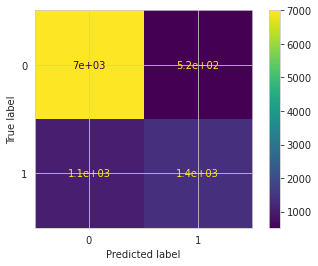

In [32]:
predicted3 = best_model.predict(X_test)

cm = confusion_matrix(y_test, predicted3, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()

Dalam hal ini ketika ditentukan model dengan parameter terbaik dapat meningkatkan akurasi model dari yang awalnya sebesar 82,4% menjadi 84,2%.